In [8]:
import numpy as np
import torch
import random
import json

In [9]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import ipywidgets as widgets


# latex text in plots
usetex = True
if usetex:
    rc('text', usetex=True)
else:
    rc('text', usetex=False)

#change plt parameter globally 
plt.rcParams.update({'font.size': 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16})

In [15]:
parent = "_weights"
children = "resnet1111_20-09"
children = "resnet1111_lr1e-3_20-09"

path = os.path.join(parent, children)
print("Load results from ", path)

Load results from  _weights/resnet1111_lr1e-3_20-09


In [16]:
with open(path + "_net_config.json") as dict_file:
    network_config = json.load(dict_file)
print(network_config)

{'network': 'ResNet', 'optimizer': 'Adam', 'batch_size': 64, 'learning_rate': 0.001, 'loss': 'BCELoss'}


In [17]:
loss = np.load(path + "_loss.npy")
loss_val = np.load(path + "_loss_val.npy")

Total number of epochs:  24


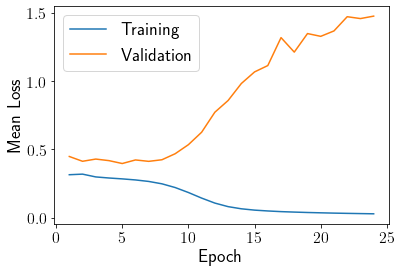

In [18]:
n_ep = len(loss)
epochs = np.arange(1,n_ep+1)
print("Total number of epochs: ", n_ep)
plt.figure()
plt.plot(epochs, loss, label="Training")
plt.plot(epochs, loss_val, label="Validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Mean Loss")
plt.show()

In [ ]:
save_image = False

fig, ax1 = plt.subplots()

color = "C1" #'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, loss, "--", color=color)
ax1.plot(epochs, loss_val, color=color)
#ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim(0.74,0.77)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = "C0" #'tab:blue'
ax2.set_ylabel('Dice Score', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs, dce, "--", color=color)
ax2.plot(epochs, dce_val, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(0.23,0.27)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
if save_image:
    plt.savefig(f"images/{widget.value}.pdf", bbox_inches='tight')
plt.show()